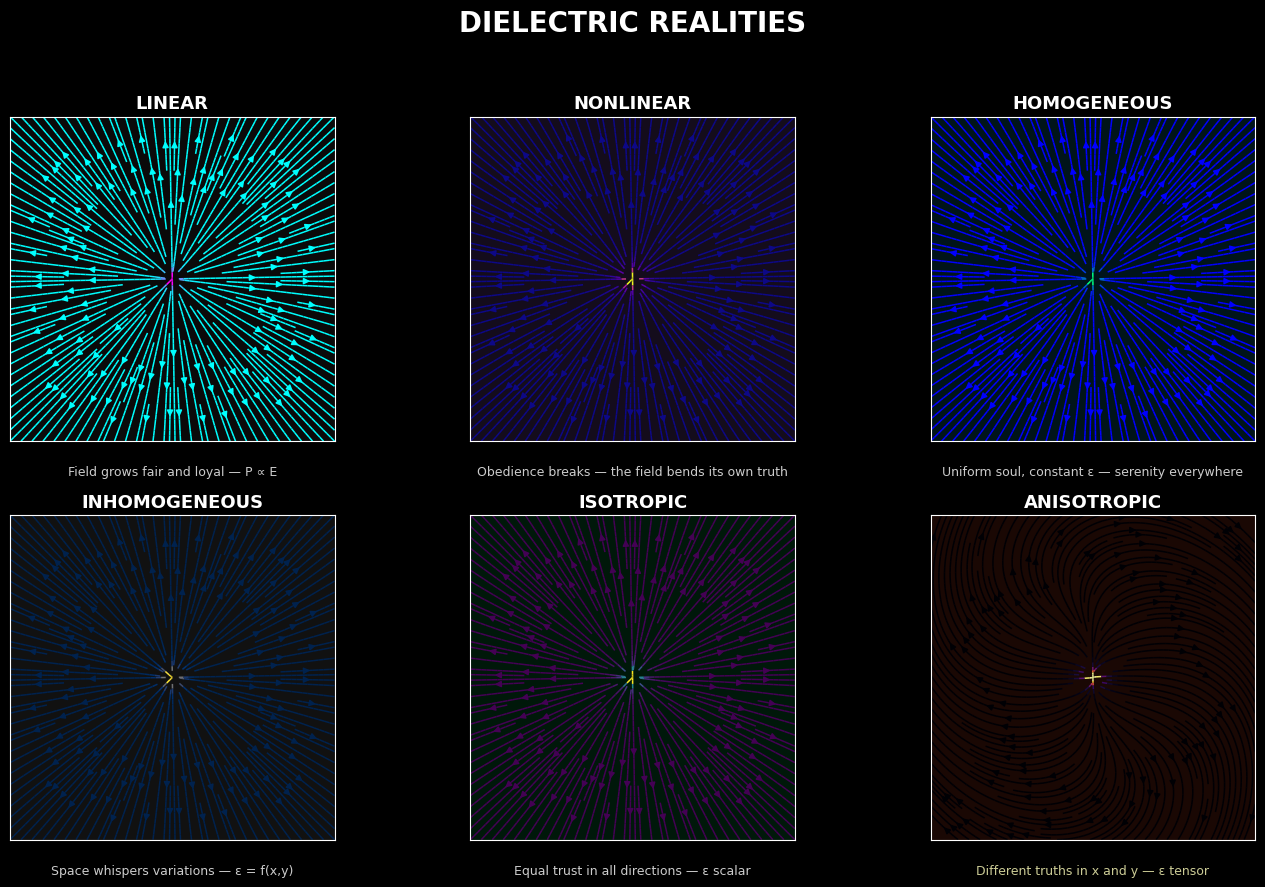

In [2]:


import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')
fig, axs = plt.subplots(2, 3, figsize=(14, 9))
fig.suptitle("DIELECTRIC REALITIES", color='white', fontsize=20, fontweight='bold', y=0.98)

x = np.linspace(-2, 2, 60)
y = np.linspace(-2, 2, 60)
X, Y = np.meshgrid(x, y)
r = np.sqrt(X**2 + Y**2) + 1e-3

E0x, E0y = X/r**3, Y/r**3

def draw(ax, Ex, Ey, title, note, cmap, bgcolor, note_color='white'):
    magnitude = np.sqrt(Ex**2 + Ey**2)
    ax.streamplot(x, y, Ex, Ey, color=magnitude, cmap=cmap, density=2, linewidth=1.1, arrowsize=0.9)
    ax.set_facecolor(bgcolor)
    ax.set_title(title, color='white', fontsize=13, fontweight='bold')
    ax.text(0, -2.3, note, color=note_color, fontsize=9, ha='center', va='top', alpha=0.8)
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

Ex1, Ey1 = E0x, E0y
draw(axs[0, 0], Ex1, Ey1,
     "LINEAR", "Field grows fair and loyal — P ∝ E",
     'cool', '#0a0a0a')


E_mag = np.sqrt(E0x**2 + E0y**2)
Ex2 = E0x * (1 + 2 * np.tanh(E_mag * 2))
Ey2 = E0y * (1 + 2 * np.tanh(E_mag * 2))
draw(axs[0, 1], Ex2, Ey2,
     "NONLINEAR", "Obedience breaks — the field bends its own truth",
     'plasma', '#140c1c')


Ex3, Ey3 = 0.8 * E0x, 0.8 * E0y
draw(axs[0, 2], Ex3, Ey3,
     "HOMOGENEOUS", "Uniform soul, constant ε — serenity everywhere",
     'winter', '#00141a')


eps = 1 + 1.2 * np.exp(-((X - 1)**2 + Y**2))
Ex4, Ey4 = E0x / eps, E0y / eps
draw(axs[1, 0], Ex4, Ey4,
     "INHOMOGENEOUS", "Space whispers variations — ε = f(x,y)",
     'cividis', '#111111')


Ex5, Ey5 = E0x, E0y
draw(axs[1, 1], Ex5, Ey5,
     "ISOTROPIC", "Equal trust in all directions — ε scalar",
     'viridis', '#00180a')


Ex6 = 1.5 * E0x + 0.2 * Y
Ey6 = 0.6 * E0y - 0.3 * X
draw(axs[1, 2], Ex6, Ey6,
     "ANISOTROPIC", "Different truths in x and y — ε tensor",
     'inferno', '#1a0804', note_color='#ffb')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("dielectric_realities_v3.png", dpi=500, facecolor='black', bbox_inches='tight')
plt.show()
